In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
%matplotlib inline

## Comparing English Schools at A-level

The data is downloaded from here: https://www.compare-school-performance.service.gov.uk/download-data

This is using 2022-23 - other years are available

In [5]:
r_23= pd.ExcelFile("2022-2023_england_ks5underlying.xlsx")

In [7]:
r_23.sheet_names

['Contents',
 'Metadata',
 'Institution_subject_results',
 'Institution_aggregated_results',
 'National_data',
 'Institution_subject_entries']

In [8]:
subj_23 = pd.read_excel(r_23, "Institution_subject_results")  

In [9]:
subj_23.columns

Index(['Year', 'Local Authority', 'URN', 'School or college name',
       'School or college type', 'Exam cohort', 'Qualification', 'Level',
       'ASIZE', 'GSIZE', 'Grade structure', 'Subject', 'Grade/Total entries',
       'Number of exams'],
      dtype='object')

In [10]:
subj_23.shape

(582314, 14)

In [11]:
subj_24 = pd.read_csv("https://explore-education-statistics.service.gov.uk/data-catalogue/data-set/0aa27be7-4958-4d9b-87c5-4af9ec6cd921/csv")

In [12]:
subj_24.columns

Index(['time_period', 'time_identifier', 'geographic_level', 'country_code',
       'country_name', 'version', 'old_la_code', 'new_la_code', 'la_name',
       'school_name', 'school_urn', 'school_laestab', 'exam_cohort',
       'qualification', 'level', 'asize', 'gsize', 'grade_structure',
       'subject', 'grade_total_entries', 'number_of_exams'],
      dtype='object')

Schools are identified by their URN's which are found here : https://www.compare-school-performance.service.gov.uk/find-a-school-in-england

In [ ]:

# Filter to schools of interest
schools_urn = [136298,138313,137353,100750,132942, 136309, 135073, 140939, 101162]


In [14]:
subj_23.loc[subj_23['URN'].isin(schools_urn)].to_csv('./data/a-level-subj-smaller_list.csv')

In [15]:

s = pd.read_csv('./data/a-level-subj-smaller_list.csv')
a_levels = s.loc[s['Qualification']=='GCE A level']

## What A-levels does a school do?

In [16]:
school = 'The Grey Coat Hospital'

a_levels.loc[a_levels['School or college name']==school]['Subject'].value_counts()

Subject
Chemistry                                      8
Mathematics (Further)                          8
Biology                                        7
Art and Design (Fine Art)                      7
Design and Technology (Textiles Technology)    7
Economics                                      7
English Language and Literature                7
Design and Technology (Product Design)         7
English Literature                             7
Film Studies                                   7
Geography                                      7
French                                         7
History                                        7
History of Art                                 7
Italian                                        7
German                                         7
Mathematics                                    7
Music                                          7
Physics                                        7
Psychology                                     7
Religious St

In [23]:
a_levels['Number of exams'] = a_levels['Number of exams'].replace('Supp',0)

/tmp/ipykernel_56279/3276443552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_levels['Number of exams'] = a_levels['Number of exams'].replace('Supp',0)


## What's the distribution of grades by school and courses

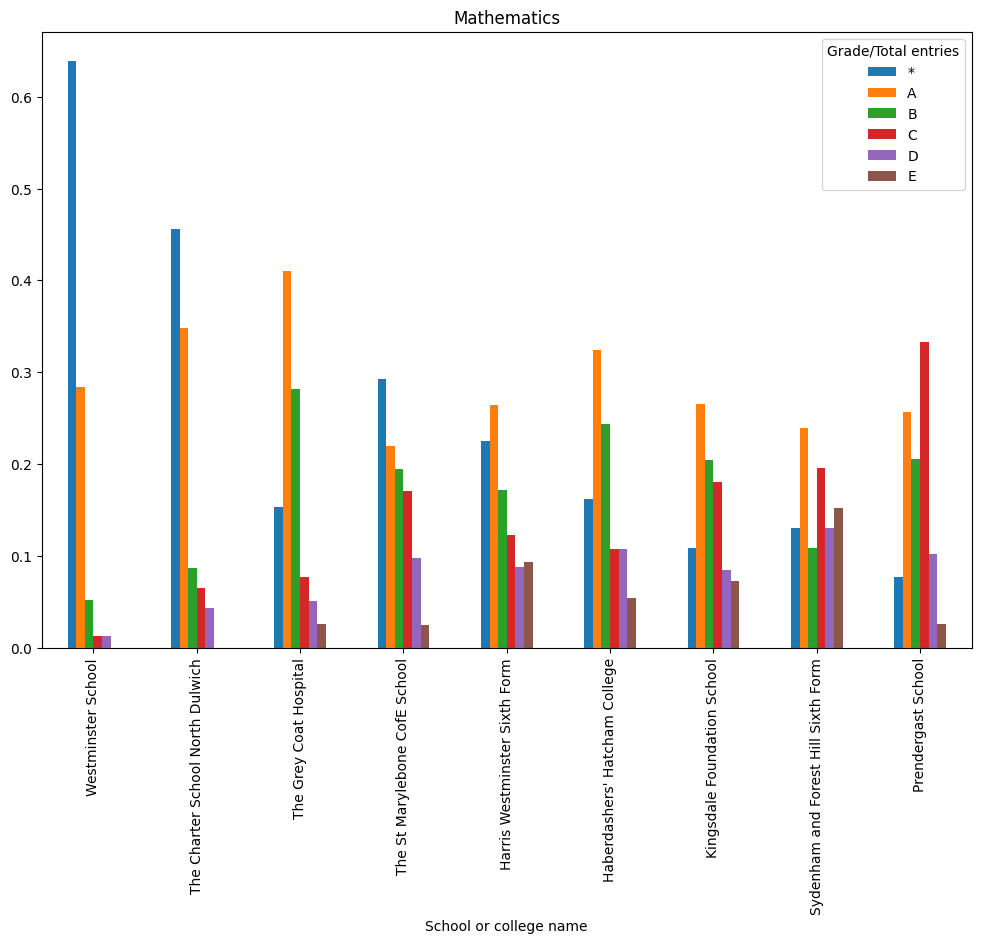

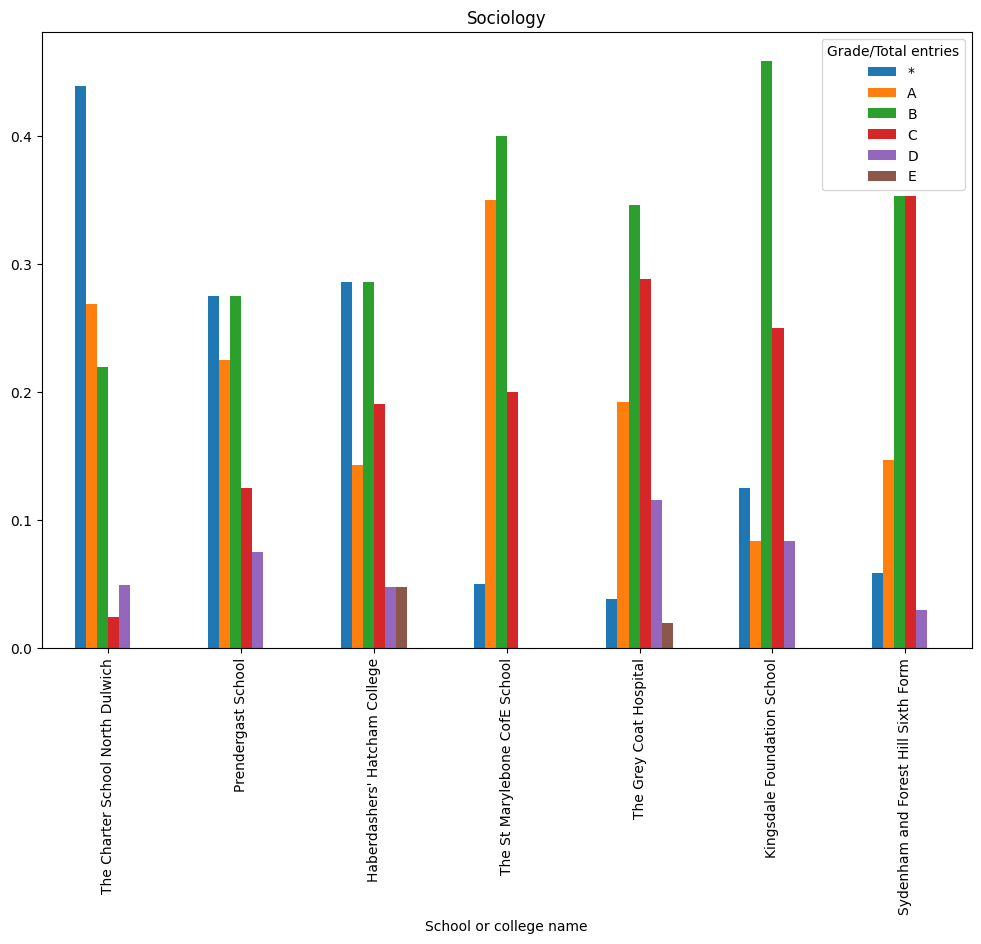

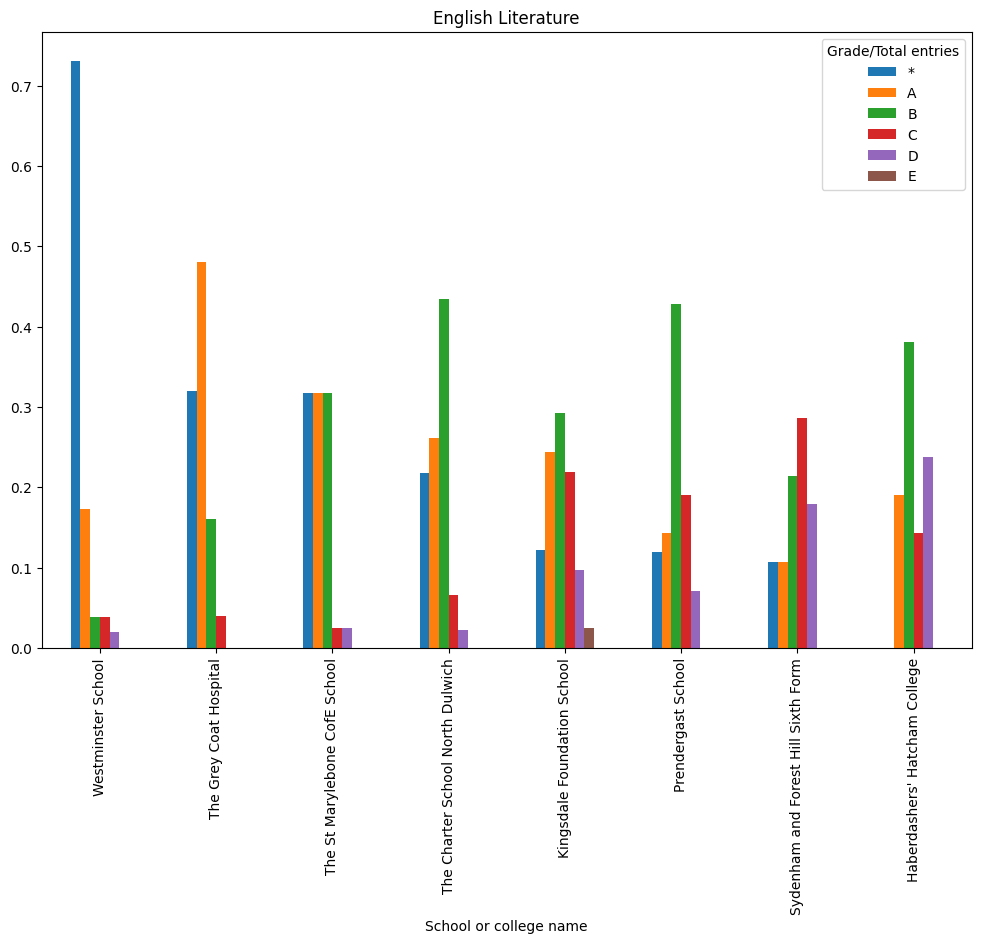

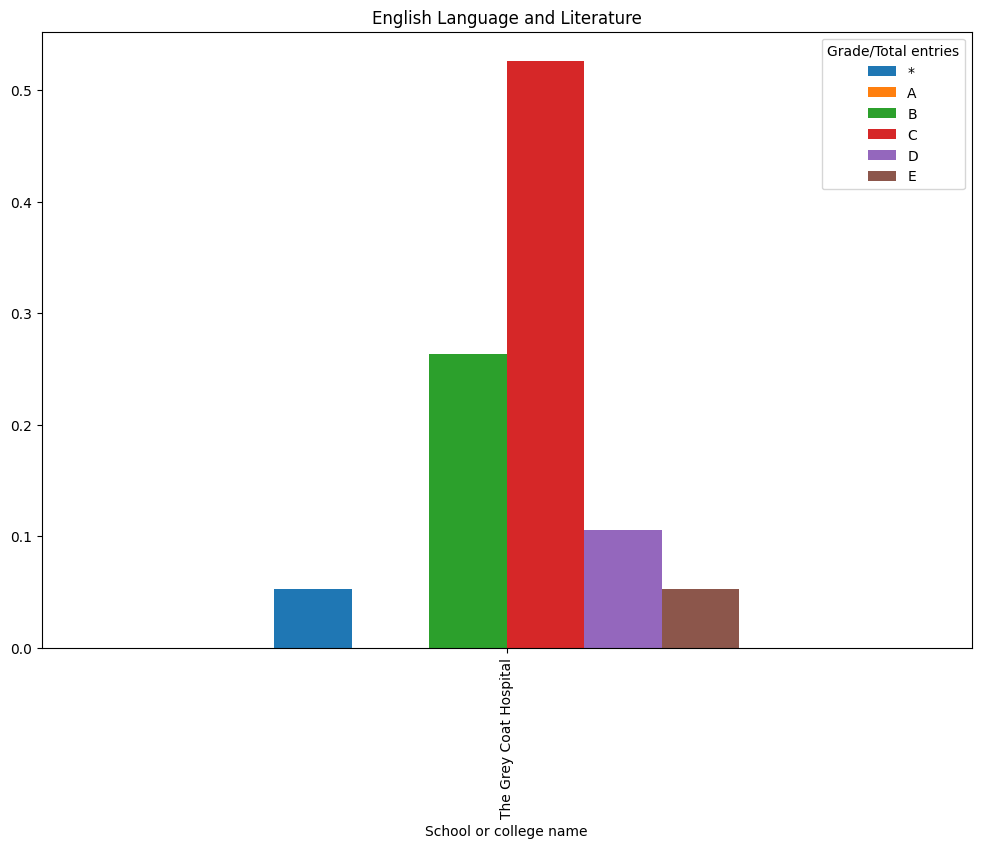

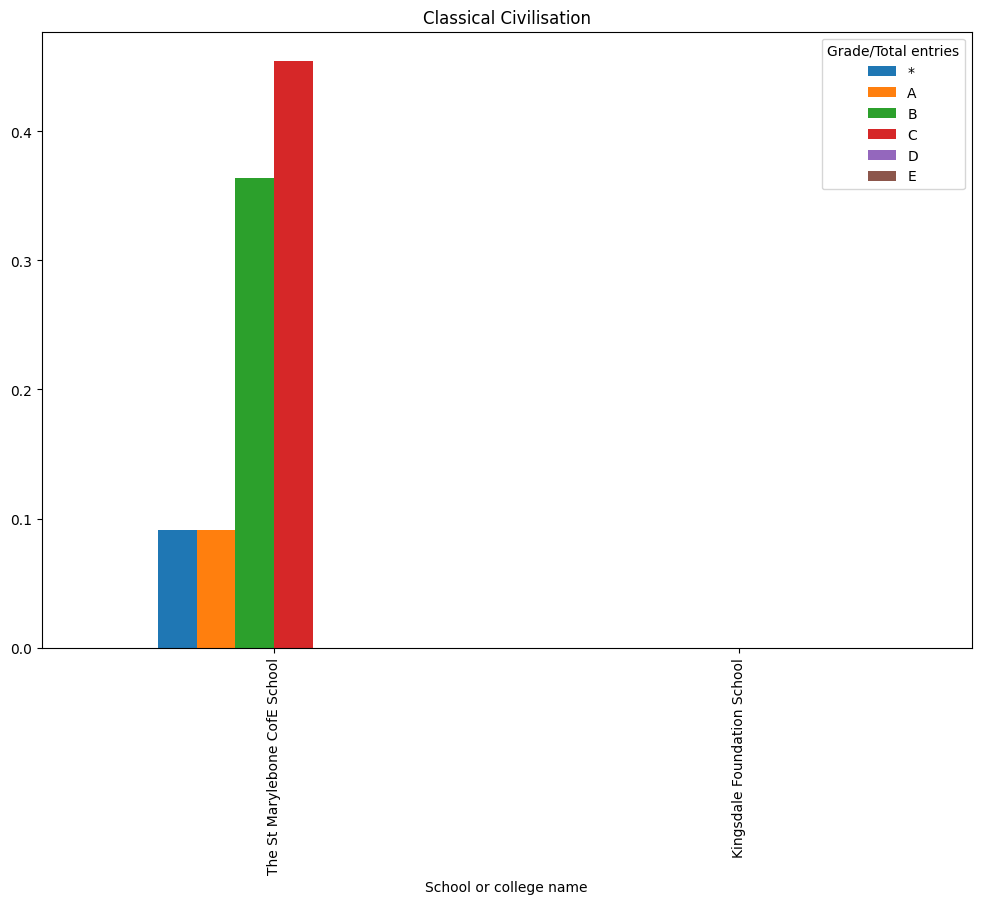

In [24]:
# courses = ['Government and Politics','History','Mathematics','Sociology','English Literature','Economics']
# s = subj_23.loc[subj_23['URN'].isin(schools_urn) ].copy()
courses = ['Mathematics','Sociology','English Literature','English Language and Literature','Classical Civilisation']


for subj in courses:
    course = a_levels.loc[(s['Subject']==subj)].pivot(
        index='School or college name', 
        columns='Grade/Total entries', 
        values='Number of exams'
        ).reset_index()
    c = course[['*', 'A', 'B', 'C', 'D', 'E', 'Total']].fillna(0).astype(float)
    c = c.div(c['Total'], axis=0)
    c['School or college name']=course['School or college name']
    c['A*A'] = sum([c['*'], c['A']])
    c.sort_values(by='A*A', axis=0, ascending=False)[['School or college name','*', 'A', 'B', 'C', 'D', 'E',]].plot(
        kind='bar', x='School or college name', figsize=(12,8), title=subj)

## What are the probability of getting a grade - in this case A*AA - for different subject groups

/tmp/ipykernel_56279/4039701183.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  best = pd.concat([best, pd.DataFrame(


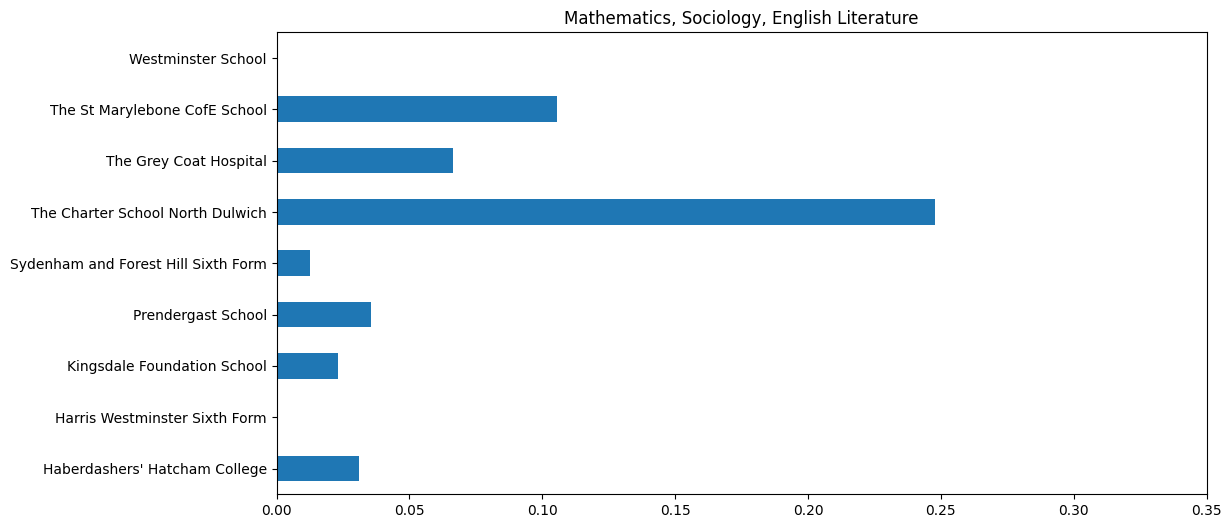

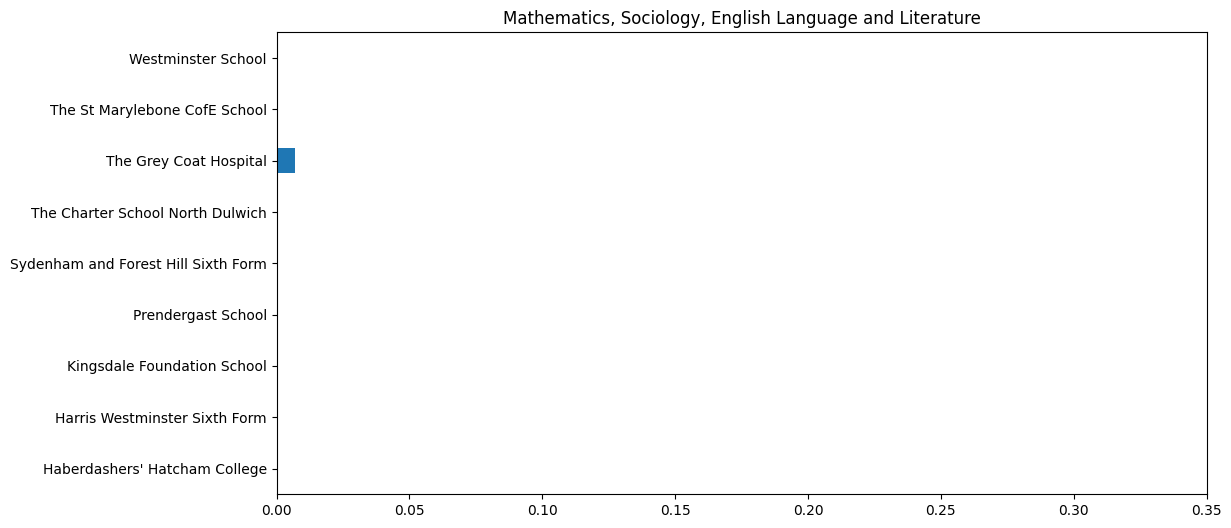

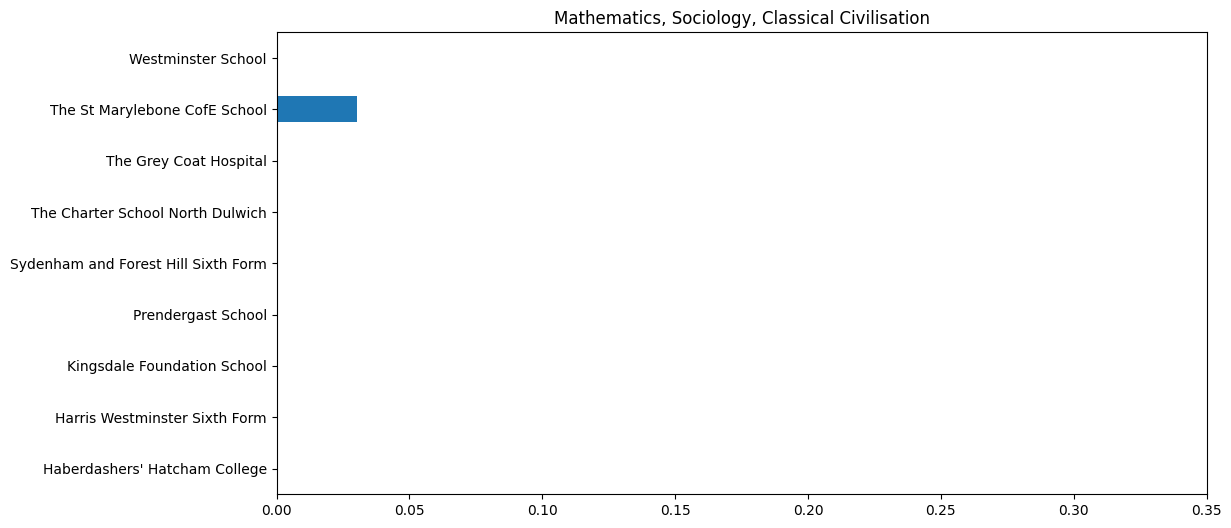

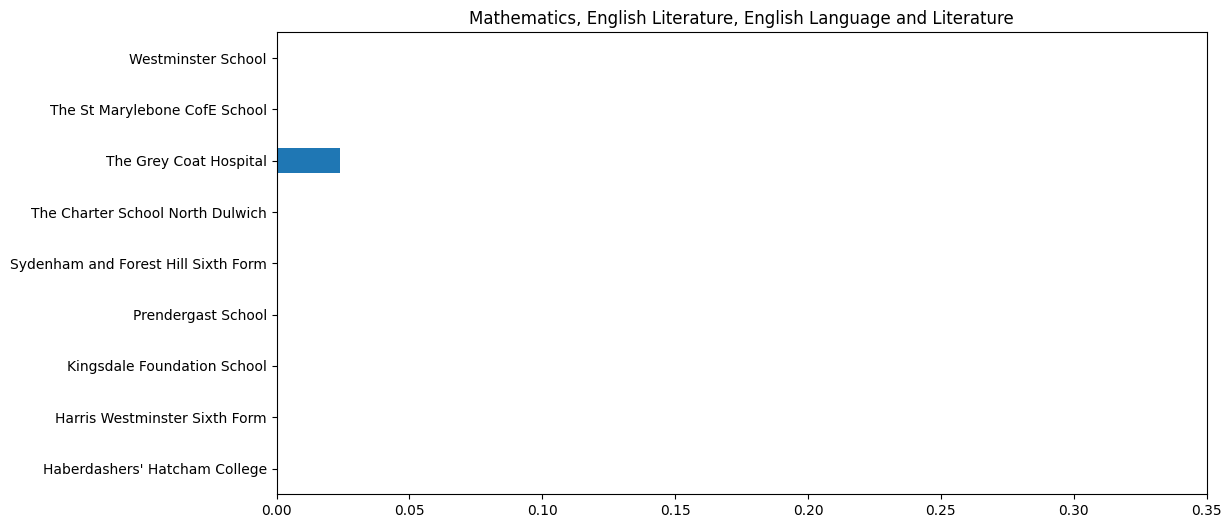

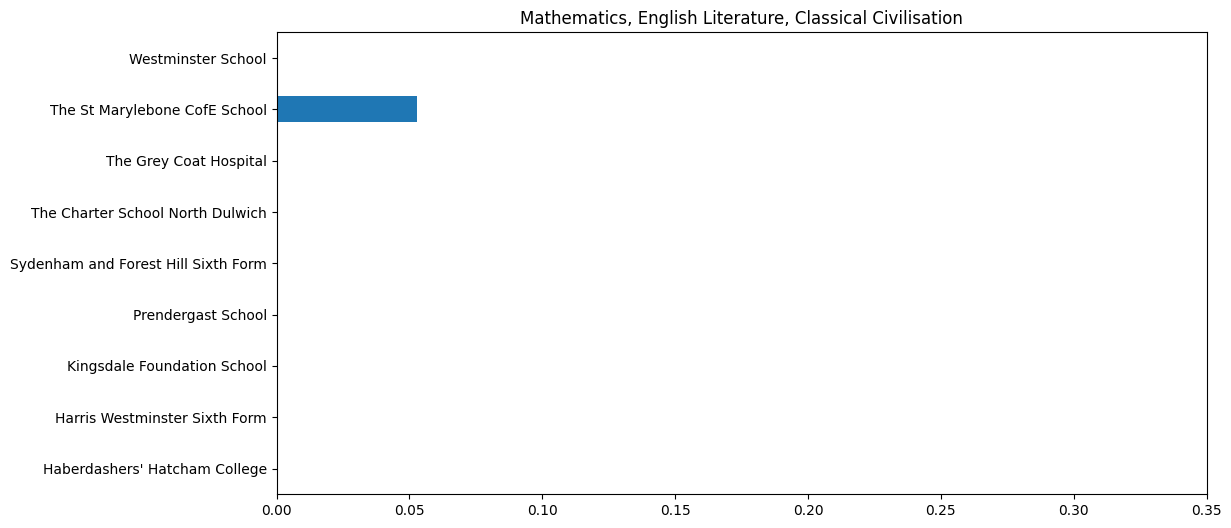

/tmp/ipykernel_56279/4039701183.py:38: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  'Best School':prob.idxmax(),


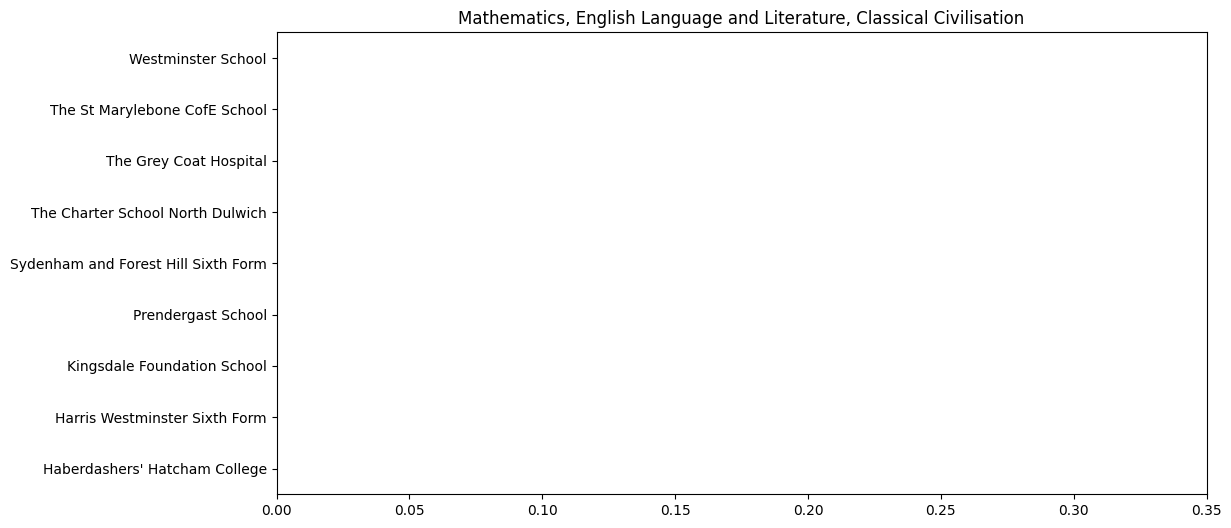

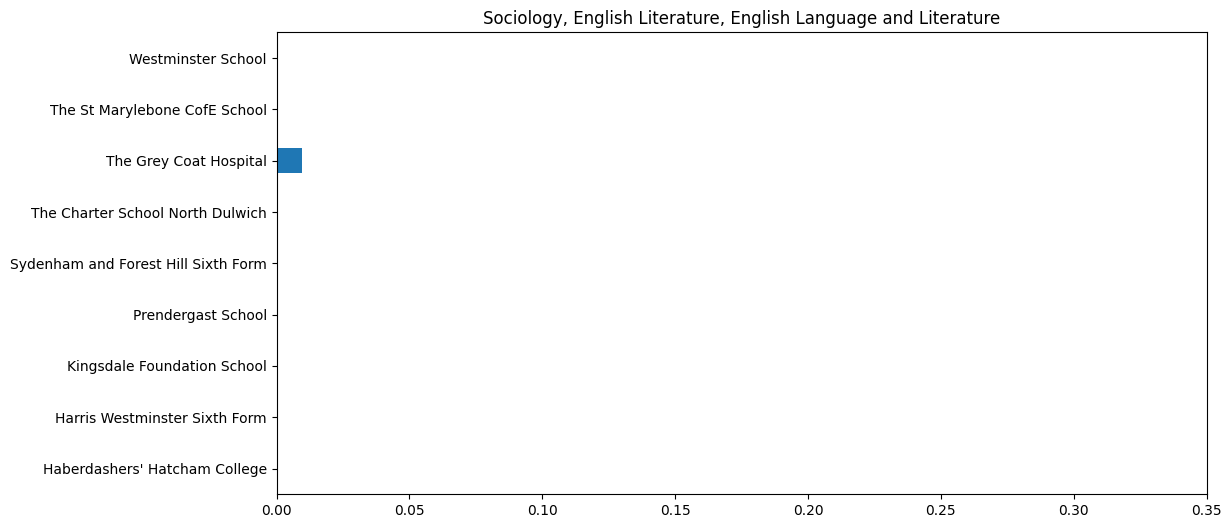

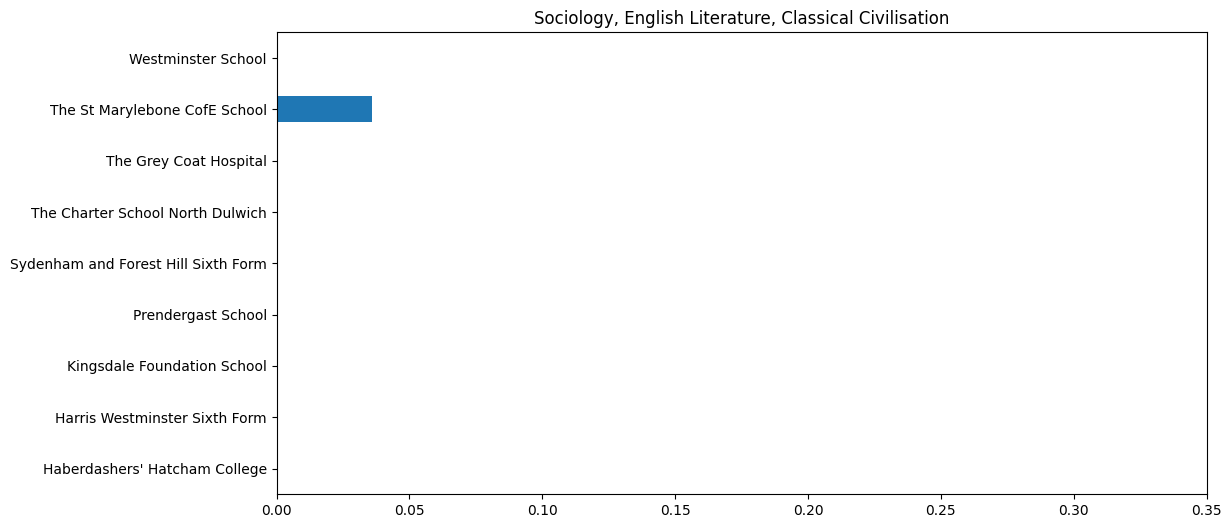

/tmp/ipykernel_56279/4039701183.py:38: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  'Best School':prob.idxmax(),


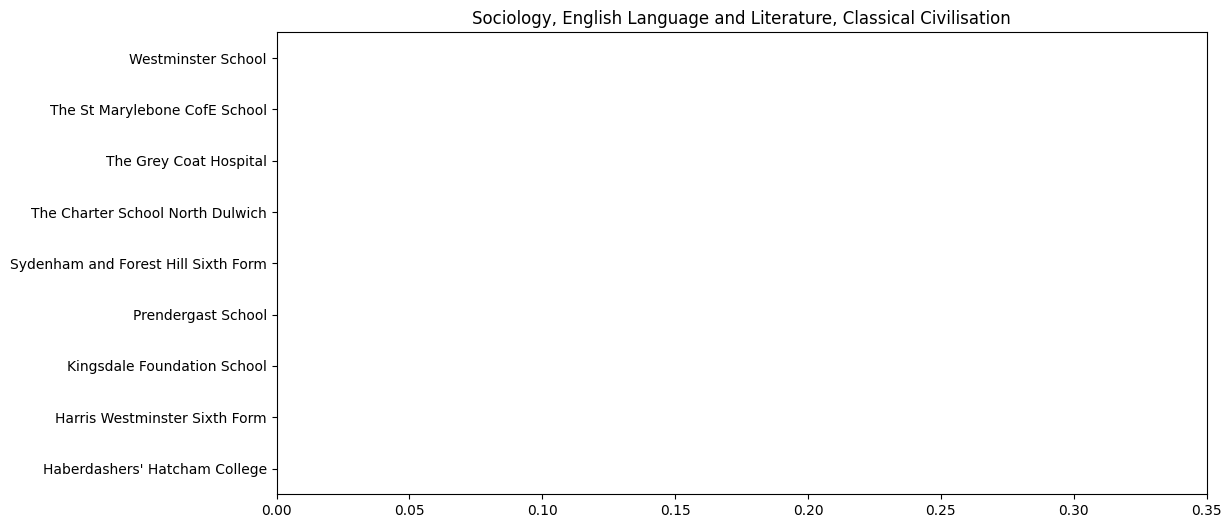

/tmp/ipykernel_56279/4039701183.py:38: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  'Best School':prob.idxmax(),


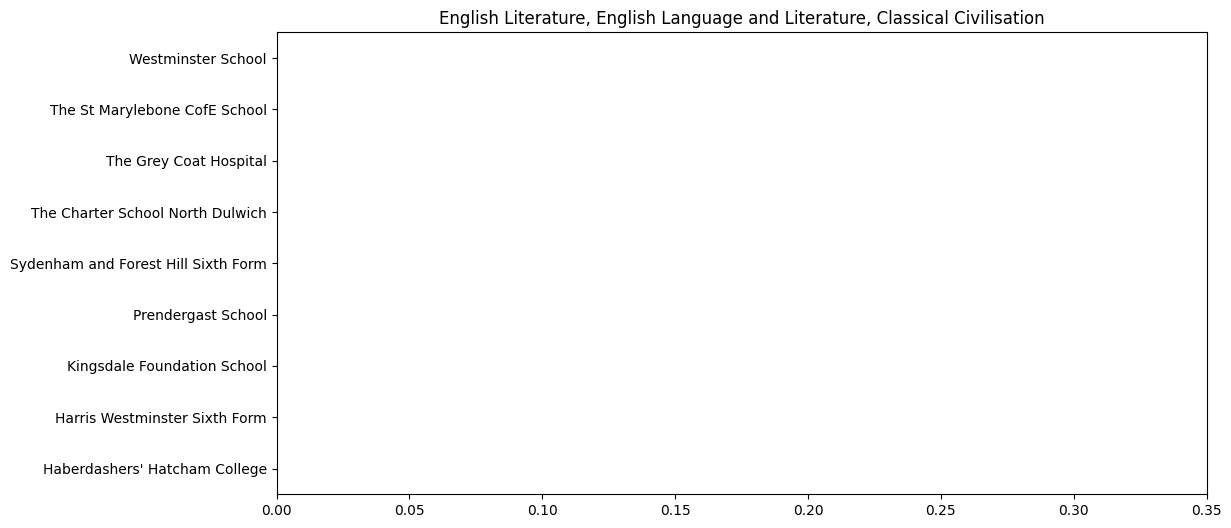

,Subject Combination,Probability,Best School,odds against
0,"Mathematics, Sociology, English Literature",0.25,The Charter School North Dulwich,3.0
1,"Mathematics, Sociology, English Language and L...",0.01,The Grey Coat Hospital,99.0
2,"Mathematics, Sociology, Classical Civilisation",0.03,The St Marylebone CofE School,32.3
3,"Mathematics, English Literature, English Langu...",0.02,The Grey Coat Hospital,49.0
4,"Mathematics, English Literature, Classical Civ...",0.05,The St Marylebone CofE School,19.0
5,"Mathematics, English Language and Literature, ...",NaN,NaN,NaN
6,"Sociology, English Literature, English Languag...",0.01,The Grey Coat Hospital,99.0
7,"Sociology, English Literature, Classical Civil...",0.04,The St Marylebone CofE School,24.0
8,"Sociology, English Language and Literature, Cl...",NaN,NaN,NaN
9,"English Literature, English Language and Liter...",NaN,NaN,NaN


In [27]:
def grade_subj(subj, a_level_results):
    course = a_level_results.loc[(a_level_results['Subject']==subj)].pivot(
    index='School or college name', 
    columns='Grade/Total entries', 
    values='Number of exams'
    ).reset_index()
    c = course[['*', 'A', 'B', 'C', 'D', 'E', 'Total']].fillna(0).astype(float)
    c = c.div(c['Total'], axis=0)
    c['School or college name']=course['School or college name']
    c['A*A'] = sum([c['*'], c['A']])
    return c[['School or college name','A*A', 'A']].set_index('School or college name')

schools = schools = ["Haberdashers' Hatcham College",
 'Harris Westminster Sixth Form',
 'Kingsdale Foundation School',
 'Prendergast School',
 'Sydenham and Forest Hill Sixth Form',
 'The Charter School North Dulwich',
 'The Grey Coat Hospital',
 'The St Marylebone CofE School',
 'Westminster School']

best = pd.DataFrame(columns = ['Best School','Probability','Subject Combination'], index=[])
odds = pd.DataFrame(index=schools)

for choice in itertools.combinations(courses, 3):
    df = pd.DataFrame({'A*A':[1.]*len(schools), 'A':[1.]*len(schools)},index=schools)
    for subj in choice:
        subject_dist =  grade_subj(subj, a_levels)
        df['A*A'] = df['A*A']*subject_dist['A*A']
        df['A'] = df['A']*subject_dist['A']
    choice_str = ", ".join(choice)
    prob= df['A*A']-df['A']
    odds[choice_str] = ((1-prob)/prob).round(1)
    best = pd.concat([best, pd.DataFrame(
        {'Subject Combination':choice_str,
         'Probability':prob.max().round(2),
         'Best School':prob.idxmax(), 
          
         }, index=[0])], ignore_index=True)
    
    

    ax = prob.plot(kind='barh', figsize=(12,6), title=choice_str)
    ax.set_xlim(0,0.35)
    plt.show()
best['odds against'] = ((1-best['Probability'])/best['Probability']).round(1)
best[['Subject Combination',
         'Probability',
         'Best School', 'odds against']]

    


# Re-express these as Odds in a Heatmap

Some schools just don't do a particular subject, so this sets the odds at a very high number for the missing values

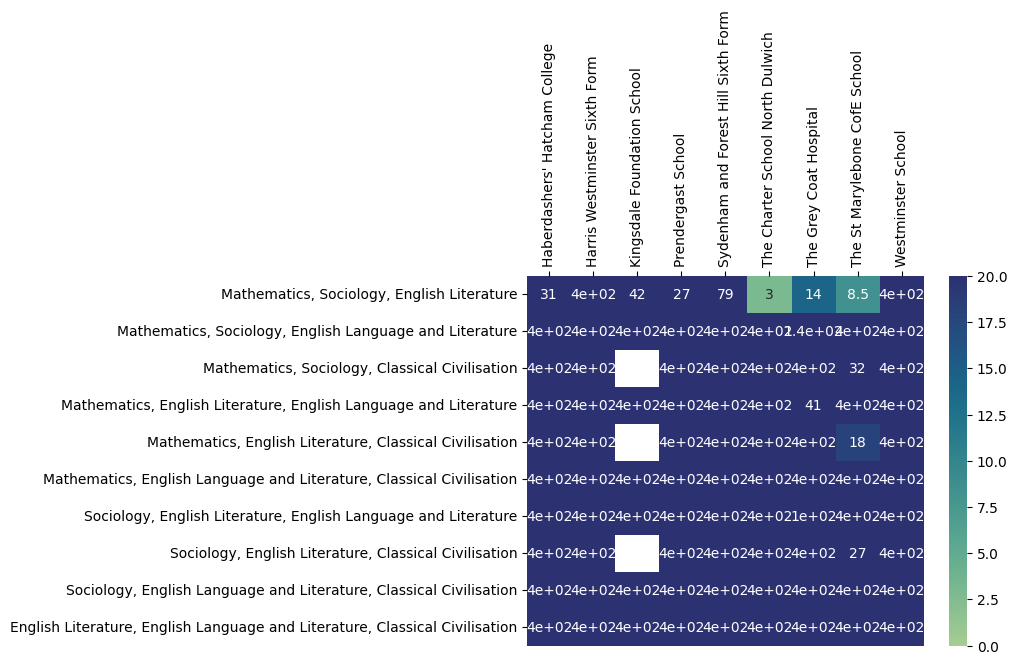

In [28]:
ax = sns.heatmap(odds.T.fillna(400).sort_values(by='The Charter School North Dulwich'), cmap="crest", annot=True, vmin=0, vmax=20)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.tick_params(axis='x', labelrotation=90)